Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. 

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import neighbors

In [113]:
df = pd.read_csv("Star.csv")

In [114]:
df.head()

,Unnamed: 0,tmathssk,treadssk,classk,totexpk,sex,freelunk,race,schidkn
0,2,473,447,small.class,7,girl,no,white,63
1,3,536,450,small.class,21,girl,no,black,20
2,5,463,439,regular.with.aide,0,boy,yes,black,19
3,11,559,448,regular,16,boy,no,white,69
4,12,489,447,small.class,5,boy,yes,white,79


In [115]:
df.dtypes

Unnamed: 0     int64
tmathssk       int64
treadssk       int64
classk        object
totexpk        int64
sex           object
freelunk      object
race          object
schidkn        int64
dtype: object

In [116]:
df.describe()

,Unnamed: 0,tmathssk,treadssk,totexpk,schidkn
count,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000
mean,5752.660404,485.648051,436.742345,9.307411,39.836639
std,3329.971901,47.771531,31.772857,5.767700,22.957552
min,2.000000,320.000000,315.000000,0.000000,1.000000
25%,2884.750000,454.000000,414.000000,5.000000,20.000000
50%,5733.500000,484.000000,433.000000,9.000000,39.000000
75%,8624.250000,513.000000,453.000000,13.000000,60.000000
max,11598.000000,626.000000,627.000000,27.000000,80.000000


In [117]:
#creating features to predict math scaled score in an OLS regression

df["class size"] = np.where(df["classk"] == "small.class", 1, (np.where(df["classk"] == "regular.with.aide", 2, 
                                                                        (np.where(df["classk"] == "regular", 3, "undetermined")))))

In [118]:
df.head()

,Unnamed: 0,tmathssk,treadssk,classk,totexpk,sex,freelunk,race,schidkn,class size
0,2,473,447,small.class,7,girl,no,white,63,1
1,3,536,450,small.class,21,girl,no,black,20,1
2,5,463,439,regular.with.aide,0,boy,yes,black,19,2
3,11,559,448,regular,16,boy,no,white,69,3
4,12,489,447,small.class,5,boy,yes,white,79,1


In [119]:
df["white"] = np.where(df["race"] == "white", 1, 0)

In [120]:
df.head(10)

,Unnamed: 0,tmathssk,treadssk,classk,totexpk,sex,freelunk,race,schidkn,class size,white
0,2,473,447,small.class,7,girl,no,white,63,1,1
1,3,536,450,small.class,21,girl,no,black,20,1,0
2,5,463,439,regular.with.aide,0,boy,yes,black,19,2,0
3,11,559,448,regular,16,boy,no,white,69,3,1
4,12,489,447,small.class,5,boy,yes,white,79,1,1
5,13,454,431,regular,8,boy,yes,white,5,3,1
6,14,423,395,regular.with.aide,17,girl,yes,black,16,2,0
7,21,500,451,regular,3,girl,no,white,56,3,1
8,23,439,478,small.class,11,girl,no,black,11,1,0
9,25,528,455,small.class,10,girl,no,white,66,1,1


In [121]:
df.columns

Index(['Unnamed: 0', 'tmathssk', 'treadssk', 'classk', 'totexpk', 'sex',
       'freelunk', 'race', 'schidkn', 'class size', 'white'],
      dtype='object')

In [122]:
del df["Unnamed: 0"]

In [125]:
df["freelunch"] = np.where(df["freelunk"] == "yes", 1, 0)

In [126]:
df.columns

Index(['tmathssk', 'treadssk', 'classk', 'totexpk', 'sex', 'freelunk', 'race',
       'schidkn', 'class size', 'white', 'freelunch'],
      dtype='object')

In [127]:
df.columns = ["mathscore", "readingscore", "classsizetext", "teachingexperience", "sex", "freelunchtext", "race", "schoolID",
             "classsize", "white", "freelunch"]

In [128]:
df.head()

,mathscore,readingscore,classsizetext,teachingexperience,sex,freelunchtext,race,schoolID,classsize,white,freelunch
0,473,447,small.class,7,girl,no,white,63,1,1,0
1,536,450,small.class,21,girl,no,black,20,1,0,0
2,463,439,regular.with.aide,0,boy,yes,black,19,2,0,1
3,559,448,regular,16,boy,no,white,69,3,1,0
4,489,447,small.class,5,boy,yes,white,79,1,1,1


In [129]:
df.head()

,mathscore,readingscore,classsizetext,teachingexperience,sex,freelunchtext,race,schoolID,classsize,white,freelunch
0,473,447,small.class,7,girl,no,white,63,1,1,0
1,536,450,small.class,21,girl,no,black,20,1,0,0
2,463,439,regular.with.aide,0,boy,yes,black,19,2,0,1
3,559,448,regular,16,boy,no,white,69,3,1,0
4,489,447,small.class,5,boy,yes,white,79,1,1,1


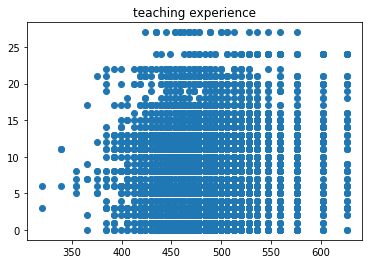

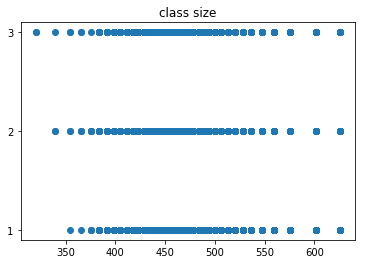

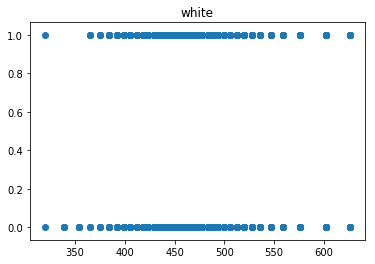

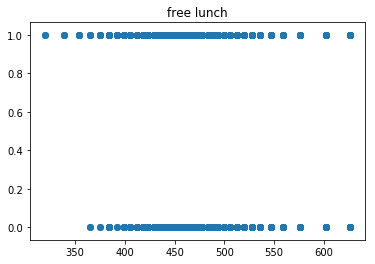

In [130]:
#testing assumption 1 (linear relationships)

outcome = df["mathscore"]

plt.scatter(outcome, df["teachingexperience"])
plt.title("teaching experience")
plt.show()

plt.scatter(outcome, df["classsize"])
plt.title("class size")
plt.show()

plt.scatter(outcome, df["white"])
plt.title("white")
plt.show()

plt.scatter(outcome, df["freelunch"])
plt.title("free lunch")
plt.show()

#teaching experience does not seem to have a linear relationship. I'm going to leave it in for now, but might engineer it
#further (into a categorical variable) to be more linear

In [131]:
regr = linear_model.LinearRegression()
Y = df["mathscore"].values.reshape(-1,1)
X = df[["teachingexperience", "classsize", "white", "freelunch"]]
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

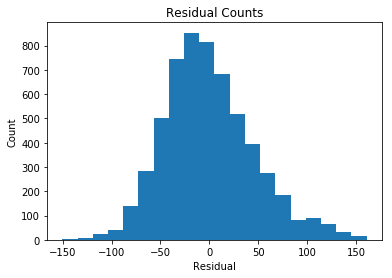

In [132]:
#exploring assumption #2: multivariate normality

X = df[["teachingexperience", "classsize", "white", "freelunch"]]

predicted = regr.predict(X).ravel()
actual = df["mathscore"]

residual = actual - predicted

plt.hist(residual, bins=20)
plt.title("Residual Counts")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.show()

#this data passes this assumption

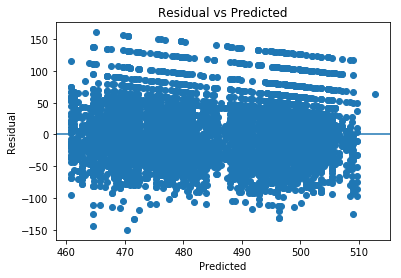

In [133]:
regr = linear_model.LinearRegression()
Y = df["mathscore"].values.reshape(-1,1)
X = df[["classsize", "white", "freelunch", "teachingexperience"]]
regr.fit(X,Y)

#exploring assumption #3: homoscedasticity
X = df[["classsize", "white", "freelunch", "teachingexperience"]]

predicted = regr.predict(X).ravel()
actual = df["mathscore"]

residual = actual - predicted

plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title("Residual vs Predicted")
plt.show()

In [134]:
#now that we have the first round of features engineered, we will test the accuracy of the model

linear_model = "mathscore ~ classsize+white+freelunch+teachingexperience"

lm = smf.ols(formula=linear_model, data=df).fit()

In [135]:
lm.params

Intercept             489.638835
classsize[T.2]         -8.312902
classsize[T.3]         -8.196257
white                   7.681018
freelunch             -19.433823
teachingexperience      0.643283
dtype: float64

In [136]:
lm.pvalues

Intercept             0.000000e+00
classsize[T.2]        3.674514e-08
classsize[T.3]        5.623951e-08
white                 1.136862e-07
freelunch             5.797907e-46
teachingexperience    1.326962e-09
dtype: float64

In [137]:
lm.rsquared
#the r-squared value is really low

0.07648438951767866

In [138]:
#seeing if the model more accurately predicts reading scores

linear_model2 = "readingscore ~ classsize+white+freelunch+teachingexperience"

lm2 = smf.ols(formula=linear_model2, data=df).fit()

In [139]:
lm2.rsquared
#not much more success in predicting reading scores

0.08750117457241025

In [140]:
#going to revise the class size to have more of an impact

df["classsize"] = np.where(df["classsizetext"] == "small.class", 1, (np.where(df["classsizetext"] == "regular.with.aide", 5, 
                                                                        (np.where(df["classsizetext"] == "regular", 10, "undetermined")))))


In [141]:
df.head()

,mathscore,readingscore,classsizetext,teachingexperience,sex,freelunchtext,race,schoolID,classsize,white,freelunch
0,473,447,small.class,7,girl,no,white,63,1,1,0
1,536,450,small.class,21,girl,no,black,20,1,0,0
2,463,439,regular.with.aide,0,boy,yes,black,19,5,0,1
3,559,448,regular,16,boy,no,white,69,10,1,0
4,489,447,small.class,5,boy,yes,white,79,1,1,1


In [142]:
#with adjusted class size numbers

linear_model = "mathscore ~ classsize+white+freelunch+teachingexperience"

lm = smf.ols(formula=linear_model, data=df).fit()

In [143]:
lm.params

Intercept             489.638835
classsize[T.10]        -8.196257
classsize[T.5]         -8.312902
white                   7.681018
freelunch             -19.433823
teachingexperience      0.643283
dtype: float64

In [144]:
lm.pvalues

Intercept             0.000000e+00
classsize[T.10]       5.623951e-08
classsize[T.5]        3.674514e-08
white                 1.136862e-07
freelunch             5.797907e-46
teachingexperience    1.326962e-09
dtype: float64

In [145]:
lm.rsquared

0.07648438951767866

In [146]:
#turning attention to the KNN regression

knn = neighbors.KNeighborsRegressor(n_neighbors=200)
X = df[["classsize", "white", "freelunch", "teachingexperience"]]
Y = df["mathscore"]
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=200, p=2,
          weights='uniform')

In [147]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=200, weights='distance')
X = df[["classsize", "white", "freelunch", "teachingexperience"]]
Y = df["mathscore"]
knn_w.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=200, p=2,
          weights='distance')

In [148]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.06 (+/- 0.02)
Weighted Accuracy: 0.14 (+/- 0.06)


In [149]:
#changing the numbers associated with "yes" and "no" for free lunch and race

df["freelunch"] = np.where(df["freelunchtext"] == "yes", 10, 0)

In [150]:
df["white"] = np.where(df["race"] == "white", 10, 0)

In [151]:
linear_model3 = "mathscore ~ classsize+white+freelunch+teachingexperience"

lm3 = smf.ols(formula=linear_model3, data=df).fit()

In [152]:
lm3.params

Intercept             489.638835
classsize[T.10]        -8.196257
classsize[T.5]         -8.312902
white                   0.768102
freelunch              -1.943382
teachingexperience      0.643283
dtype: float64

In [153]:
lm3.pvalues

Intercept             0.000000e+00
classsize[T.10]       5.623951e-08
classsize[T.5]        3.674514e-08
white                 1.136862e-07
freelunch             5.797907e-46
teachingexperience    1.326962e-09
dtype: float64

In [154]:
lm3.rsquared

0.07648438951767877

In [155]:
#seeing if the new race and free lunch numbers impact the KNN models

knn = neighbors.KNeighborsRegressor(n_neighbors=200)
X = df[["classsize", "white", "freelunch", "teachingexperience"]]
Y = df["mathscore"]
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=200, p=2,
          weights='uniform')

In [156]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=200, weights='distance')
X = df[["classsize", "white", "freelunch", "teachingexperience"]]
Y = df["mathscore"]
knn_w.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=200, p=2,
          weights='distance')

In [157]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.09 (+/- 0.03)
Weighted Accuracy: 0.14 (+/- 0.06)


In [158]:
#trying with JUST class size as an independent variable because it's often argued that small class size results in better scores

linear_model4 = "mathscore ~ classsize"

lm4 = smf.ols(formula=linear_model4, data=df).fit()

In [159]:
lm4.rsquared

0.006417350636075625

In [160]:
knn = neighbors.KNeighborsRegressor(n_neighbors=200)
X = df[["classsize"]]
Y = df["mathscore"]
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=200, p=2,
          weights='uniform')

In [161]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=200, weights='distance')
X = df[["classsize"]]
Y = df["mathscore"]
knn_w.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=200, p=2,
          weights='distance')

In [162]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.00 (+/- 0.01)
Weighted Accuracy: 0.00 (+/- 0.01)


One of the most often brought up arguments in education is that class size affects the quality of students' education and their test scores. Both the OLS regression model and the KNN regression model say otherwise - that there is actually close to no correlation between class size and test score.

I went through a few different iterations of both the KNN model and the OLS model. None of the models was incredibly predictive. The most predictive was the weighted KNN model. Additionally, when the number of neighbors was increased, the accuracy of the model increased from .07 to .14. I believe the weighted KNN model was more effective than the OLS model with this dataset because there isn't a ton of correlation between the independent and dependent variables, which makes drawing a linear regression line and basing predictions off of it challenging. What is (at least more) doable with this dataset is finding neighbors that have similar conditions and averaging those scores to predict the score of a potential class. 